**Carreira em Ciência de Dados: o que pesa mais, Idade ou Instrução?
**




                             Se você gostou, não esqueça de deixar um upvote!

**Índice
**

1. Introdução: A Pergunta
2. Primeiro Tratamento dos Dados
3. Analisando as Correlações
4. Reinterpretando os Dados
5. Criando o Modelo Logístico
6. Análise Gráfica
7. Considerações Finais
8. Referências

**1. Introdução: A Pergunta
**

Para começar qualquer análise sobre um conjunto de dados (dataset) é importante antes elaborar uma pergunta ou perguntas sobre o que se quer enxergar. Normalmente, esta pergunta surge depois de um olhar atencioso, ainda que por vezes superficial sobre os dados em si. 

Ao colocar apenas os pés neste lago riquíssimo de dados que originou a pesquisa State of Data 2021, já é possível identificar pelo menos 3 pilares que chamam a atenção: idade, instrução e salário. 

A pergunta que surge já neste ponto é: como estes dados se correlacionam? A pertinência dessa questão se dá quando se olha para o Mercado de Trabalho como um todo, independente de ser ou não na área de Dados. Segundo a OMS (Organização Mundial da Saúde) o período pré-idosos se inicia à partir dos 55 anos¹, e não faltam artigos na internet discutindo a dificuldade de inserir pessoas mais velhas dentro do Mercado². Por outro lado, curiosamente, no universo masculino a faixa etária predominante de lideranças no Mercado entre 1995 a 2015 ficou entre 40 a 49 anos, sendo que em 2015 o pessoal dos 50 a 64 anos superou os "quarentões"³. Não parece, no entanto, que muita coisa mudou de lá pra cá.

Olhando dessa forma, parece que se você não é idoso (acima de 55) mas também não tem menos que 40 anos, as chances de você ter melhores cargos e, consequentemente, melhores salários, são maiores. Mas voltando a pergunta anterior sobre o nosso conjunto de dados, será que isso se repete também na área de Ciência de Dados? E sendo essa uma área muito exigente no que diz respeito ao conhecimento ou instrução, qual fator manda mais?

**Conjunto de Dados 
**

Sobre a dataset (State of Data 2021), é importante dizer que ele é muito rico e possui material para várias análises, desde satisfação dos trabalhadores nessa área até perspectivas de salários por gênero. Resumidamente, a divisão do questionário se deu em 9 partes:
- Dados demográficos
- Dados sobre carreira
- Desafio dos gestores de times de dados
- Conhecimentos na área de dados
- Objetivos na área de dados
- Conhecimentos em Engenharia de Dados
- Conhecimentos em Análise de Dados
- Conhecimentos em Ciência de Dados
- Sobre a comunidade Data Hackers
No entanto, para a pergunta definida acima basta que nos concentremos em algumas variáveis.

**2. Primeiro Tratamento dos Dados
**

Para as análises que se verá abaixo foi utilizado a linguagem R e alguns pacotes correspondentes. Sendo assim, o primeiro passo é o carregamento de pendências, ou seja, das bibliotecas.

In [1]:
install.packages("pacman")
library(pacman)

pacman::p_load(GGally, dplyr, corrplot, car, mlogit, nnet,
               AER, lmtest, gtsummary, reshape2, 
			   ggplot2)
        
df = read.csv("../input/state-of-data-2021/State of Data 2021 - Dataset - Pgina1.csv",
              header = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘nloptr’, ‘pbkrtest’, ‘lme4’



car installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


AER installed



Dentre as variáveis que interessam, estão:
- Idade
- Região
- Região de Origem
- Mudou de Estado
- Nível de Ensino
- Gestor
- Faixa Salarial
- Experiência na Área de Dados (Xp_Area de Dados)
- Experiência em Engenharia de Software (Xp_Engenharia de Software)

Sendo que, a segunda, terceira e quarta, dizem respeito a geolocalização do entrevistado. Esse dado é importante, pois permite identificar o quanto a Região de origem foi impactante para a carreira do profissional; sendo assim, utilizou-se o seguindo raciocínio lógico: se mudou de Estado, considera região de origem, se não, considera a variável região.

Outras variáveis que valem a pena explicar a importância são: Experiência ou XP na área de dados e em engenharia de software, isso porque considera-se experiência profissional também como uma forma de instrução ou formação "informal", ou seja, não foi adquirida em um curso de pós-graduação por exemplo.

Por fim, em resumo, todas essas variáveis se traduzem nos 3 pilares ditos anteriormente: idade, instrução e salário.

In [2]:
newdf = df[ , c(1,2,7:10,15,19:21)]

newdf = rename(newdf, 
        c("ID"="X..P0....id..",
          "Idade"="X..P1_a.....Idade..",
          "Regiao"="X..P1_e_b.....Regiao.onde.mora..",
          "Regiao de origem"="X..P1_g_b.....Regiao.de.origem..",
          "Mudou de estado"="X..P1_g_c.....Mudou.de.Estado...",
          "Nivel de Ensino"="X..P1_h.....Nivel.de.Ensino..",
          "Gestor"="X..P2_d.....Gestor...",
          "Faixa Salarial"="X..P2_h.....Faixa.salarial..",
          "Xp_Area de Dados"="X..P2_i.....Quanto.tempo.de.experiência.na.área.de.dados.você.tem...",
          "Xp_Engenharia de Software"="X..P2_j.....Quanto.tempo.de.experiência.na.área.de.TI.Engenharia.de.Software.você.teve.antes.de.começar.a.trabalhar.na.área.de.dados..."
))

Depois, visando construir gráficos de correlação é fundamental que se transforme algumas variáveis categóricas (que são constituidas por frases ou afirmações do tipo não númerica) em variáveis numéricas.

In [3]:
newdf$ID = seq(newdf$ID)

newdf$Regiao = ifelse(newdf$Regiao == "Norte", "1", newdf$Regiao)
newdf$Regiao = ifelse(newdf$Regiao == "Sul", "2", newdf$Regiao)
newdf$Regiao = ifelse(newdf$Regiao == "Sudeste", "3", newdf$Regiao)
newdf$Regiao = ifelse(newdf$Regiao == "Nordeste", "4", newdf$Regiao)
newdf$Regiao = ifelse(newdf$Regiao == "Centro-oeste", "5", newdf$Regiao)
newdf$Regiao = ifelse(newdf$Regiao == "Exterior", "6", newdf$Regiao)

newdf$`Regiao de origem` = ifelse(newdf$`Regiao de origem` == "Norte", "1", newdf$`Regiao de origem`)
newdf$`Regiao de origem` = ifelse(newdf$`Regiao de origem` == "Sul", "2", newdf$`Regiao de origem`)
newdf$`Regiao de origem` = ifelse(newdf$`Regiao de origem` == "Sudeste", "3", newdf$`Regiao de origem`)
newdf$`Regiao de origem` = ifelse(newdf$`Regiao de origem` == "Nordeste", "4", newdf$`Regiao de origem`)
newdf$`Regiao de origem` = ifelse(newdf$`Regiao de origem` == "Centro-oeste", "5", newdf$`Regiao de origem`)
       
newdf$`Nivel de Ensino` = ifelse(newdf$`Nivel de Ensino` == "Estudante de Graduação", "1", newdf$`Nivel de Ensino`)
newdf$`Nivel de Ensino` = ifelse(newdf$`Nivel de Ensino` == "Não tenho graduação formal", "1", newdf$`Nivel de Ensino`)
newdf$`Nivel de Ensino` = ifelse(newdf$`Nivel de Ensino` == "Graduação/Bacharelado", "2", newdf$`Nivel de Ensino`)
newdf$`Nivel de Ensino` = ifelse(newdf$`Nivel de Ensino` == "Pós-graduação", "3", newdf$`Nivel de Ensino`)
newdf$`Nivel de Ensino` = ifelse(newdf$`Nivel de Ensino` == "Mestrado", "4", newdf$`Nivel de Ensino`)
newdf$`Nivel de Ensino` = ifelse(newdf$`Nivel de Ensino` == "Doutorado ou Phd", "4", newdf$`Nivel de Ensino`)
newdf$`Nivel de Ensino` = ifelse(newdf$`Nivel de Ensino` == "Prefiro não informar", "0", newdf$`Nivel de Ensino`)
            
newdf$`Xp_Area de Dados` = ifelse(newdf$`Xp_Area de Dados` == "Menos de 1 ano", "1", newdf$`Xp_Area de Dados`)
newdf$`Xp_Area de Dados` = ifelse(newdf$`Xp_Area de Dados` == "de 1 a 2 anos", "2", newdf$`Xp_Area de Dados`)
newdf$`Xp_Area de Dados` = ifelse(newdf$`Xp_Area de Dados` == "de 2 a 3 anos", "3", newdf$`Xp_Area de Dados`)
newdf$`Xp_Area de Dados` = ifelse(newdf$`Xp_Area de Dados` == "de 4 a 5 anos", "4", newdf$`Xp_Area de Dados`)
newdf$`Xp_Area de Dados` = ifelse(newdf$`Xp_Area de Dados` == "de 6 a 10 anos", "5", newdf$`Xp_Area de Dados`)
newdf$`Xp_Area de Dados` = ifelse(newdf$`Xp_Area de Dados` == "Mais de 10 anos", "6", newdf$`Xp_Area de Dados`)
newdf$`Xp_Area de Dados` = ifelse(newdf$`Xp_Area de Dados` == "Não tenho experiência na Área de dados", "0", newdf$`Xp_Area de Dados`)
       
newdf$`Xp_Engenharia de Software` = ifelse(newdf$`Xp_Engenharia de Software` == "Menos de 1 ano", "1", newdf$`Regiao de origem`)
newdf$`Xp_Engenharia de Software` = ifelse(newdf$`Xp_Engenharia de Software` == "de 1 a 2 anos", "2", newdf$`Xp_Engenharia de Software`)
newdf$`Xp_Engenharia de Software` = ifelse(newdf$`Xp_Engenharia de Software` == "de 2 a 3 anos", "3", newdf$`Xp_Engenharia de Software`)
newdf$`Xp_Engenharia de Software` = ifelse(newdf$`Xp_Engenharia de Software` == "de 4 a 5 anos", "4", newdf$`Xp_Engenharia de Software`)
newdf$`Xp_Engenharia de Software` = ifelse(newdf$`Xp_Engenharia de Software` == "de 6 a 10 anos", "5", newdf$`Xp_Engenharia de Software`)
newdf$`Xp_Engenharia de Software` = ifelse(newdf$`Xp_Engenharia de Software` == "Mais de 10 anos", "6", newdf$`Xp_Engenharia de Software`)
newdf$`Xp_Engenharia de Software` = ifelse(newdf$`Xp_Engenharia de Software` == "Não tive experiência na Área de TI/Engenharia de Software antes de começar a trabalhar na Área de dados", "0", newdf$`Xp_Engenharia de Software`)

newdf$`Faixa Salarial` = ifelse(newdf$`Faixa Salarial` == "Menos de R$ 1.000/mês", "1", newdf$`Faixa Salarial`)
newdf$`Faixa Salarial` = ifelse(newdf$`Faixa Salarial` == "de R$ 1.001/mês a R$ 2.000/mês", "2", newdf$`Faixa Salarial`)
newdf$`Faixa Salarial` = ifelse(newdf$`Faixa Salarial` == "de R$ 2.001/mês a R$ 3000/mês", "3", newdf$`Faixa Salarial`)
newdf$`Faixa Salarial` = ifelse(newdf$`Faixa Salarial` == "de R$ 3.001/mês a R$ 4.000/mês", "4", newdf$`Faixa Salarial`)
newdf$`Faixa Salarial` = ifelse(newdf$`Faixa Salarial` == "de R$ 4.001/mês a R$ 6.000/mês", "5", newdf$`Faixa Salarial`)
newdf$`Faixa Salarial` = ifelse(newdf$`Faixa Salarial` == "de R$ 6.001/mês a R$ 8.000/mês", "6", newdf$`Faixa Salarial`)
newdf$`Faixa Salarial` = ifelse(newdf$`Faixa Salarial` == "de R$ 8.001/mês a R$ 12.000/mês", "7", newdf$`Faixa Salarial`)
newdf$`Faixa Salarial` = ifelse(newdf$`Faixa Salarial` == "de R$ 12.001/mês a R$ 16.000/mês", "8", newdf$`Faixa Salarial`)
newdf$`Faixa Salarial` = ifelse(newdf$`Faixa Salarial` == "de R$ 16.001/mês a R$ 20.000/mês", "9", newdf$`Faixa Salarial`)
newdf$`Faixa Salarial` = ifelse(newdf$`Faixa Salarial` == "de R$ 20.001/mês a R$ 25.000/mês", "10", newdf$`Faixa Salarial`)
newdf$`Faixa Salarial` = ifelse(newdf$`Faixa Salarial` == "de R$ 25.001/mês a R$ 30.000/mês", "11", newdf$`Faixa Salarial`)
newdf$`Faixa Salarial` = ifelse(newdf$`Faixa Salarial` == "de R$ 30.001/mês a R$ 40.000/mês", "12", newdf$`Faixa Salarial`)
newdf$`Faixa Salarial` = ifelse(newdf$`Faixa Salarial` == "Acima de R$ 40.001/mês", "13", newdf$`Faixa Salarial`)

newdf$Regiao = ifelse(newdf$`Mudou de estado` == 1, newdf$`Regiao de origem`, newdf$Regiao)

newdf = newdf[ , c(-4,-5)]

newdf$Regiao = as.numeric(newdf$Regiao)
newdf$`Nivel de Ensino` = as.numeric(newdf$`Nivel de Ensino`)
newdf$`Faixa Salarial` = as.numeric(newdf$`Faixa Salarial`)
newdf$`Xp_Area de Dados` = as.numeric(newdf$`Xp_Area de Dados`)
newdf$`Xp_Engenharia de Software` = as.numeric(newdf$`Xp_Engenharia de Software`)

glimpse(newdf)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


Rows: 2,645
Columns: 8
$ ID                          <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,…
$ Idade                       <int> 38, 39, 30, 38, 36, NA, 24, 51, 39, 27, 42…
$ Regiao                      <dbl> 4, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 5, 2, 2, …
$ `Nivel de Ensino`           <dbl> 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 4, 3, 3, 2, …
$ Gestor                      <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ `Faixa Salarial`            <dbl> 5, 6, 7, 8, 7, 7, 4, 8, 5, 5, 12, 6, 10, 5…
$ `Xp_Area de Dados`          <dbl> 6, 3, 2, 6, 2, 4, 2, 6, 2, 2, 6, 3, 4, 4, …
$ `Xp_Engenharia de Software` <dbl> NA, 3, NA, 1, NA, NA, NA, NA, 1, NA, NA, 1…


**3. Analisando as Correlações
**

Quanto uma variável impacta na outra? Para responder essa pergunta é necessário criar uma correlação. Nessa análise em específico pode-se obervar esse dado em dois gráficos diferentes, porém, complementares: de pares (pairs) e de correlação (corr).

Warning message:
“Removed 28 rows containing non-finite values (stat_density).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 28 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 28 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 304 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 304 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 426 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 1805 rows containing missing values”
Warning message:
“Removed 28 rows containing missing values (geom_point).”
Warning message in ggally_statistic(data = data, mapping = mapping

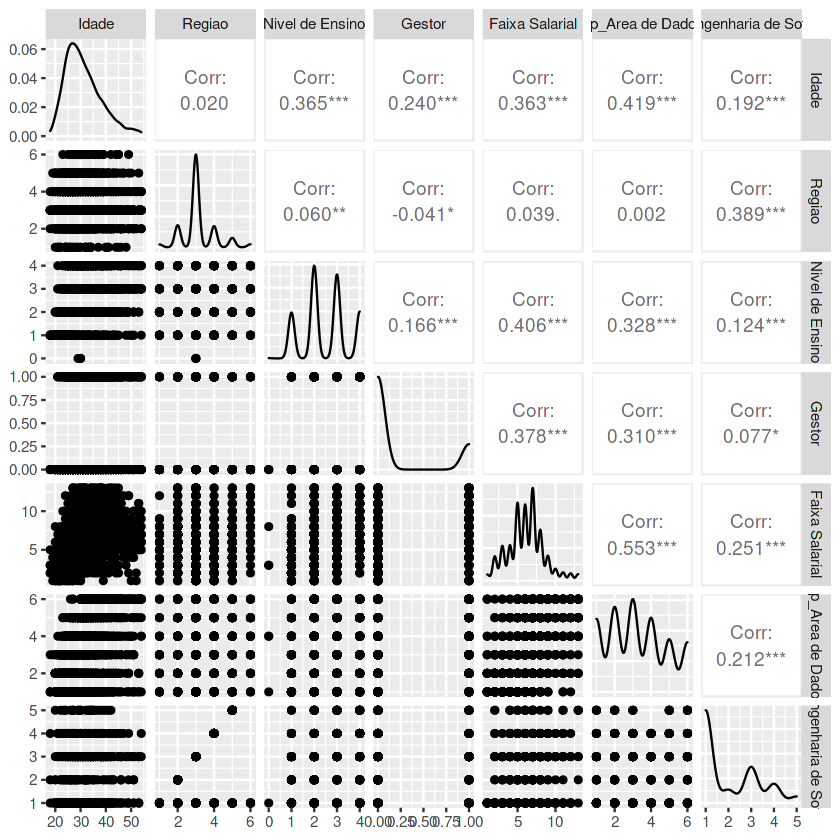

In [4]:
ggpairs(newdf [ , -1])

![Gráfico de Pares](https://i.postimg.cc/0yjDH9mw/PAIRS.png)

Neste primeiro, um pouco mais complexo, pode-se ver 3 pontos de vista: na diagonal principal, onde a correlação é entre uma variável com ela mesma e isso obviamente resulta em 100%, temos no entanto gráficos de distribuição de frequências; na triângulação inferior dessa matriz vê-se gráficos de pontos ou
dispersão, que são importantes para enxergar possíveis outliers (dados, nesse caso pontos, que se diferenciam drasticamente de todos os outros); na triângulação superior vê-se o que de fato interessa mais nesse caso, as correlações. No entanto, outro gráfico mais específico pode ser mais intuitivo.

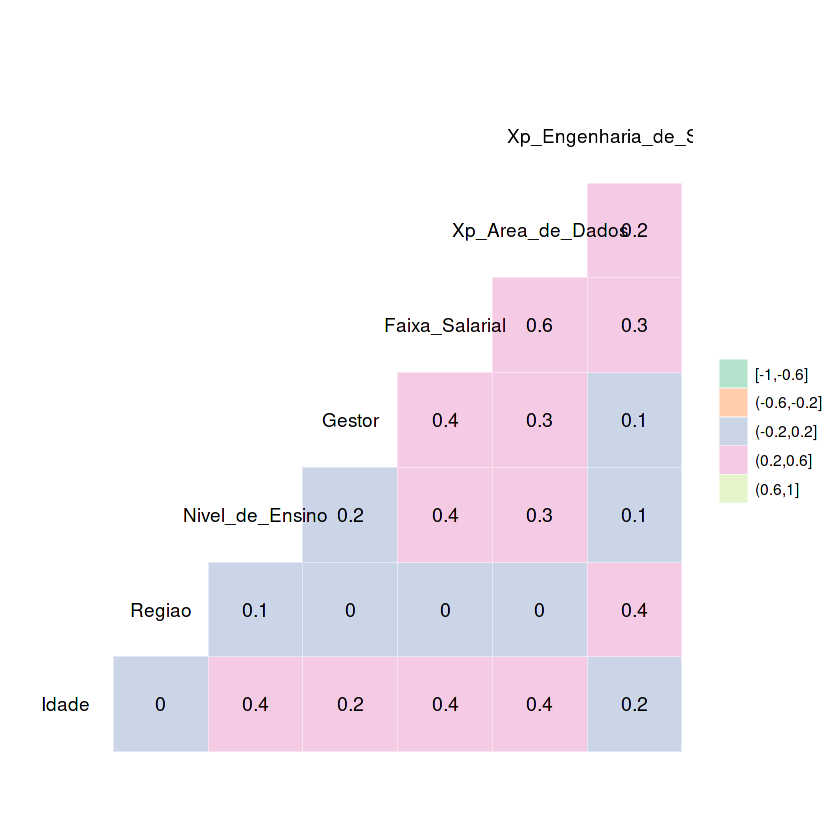

In [5]:
ggcorr(newdf [ , -1], label=TRUE, nbreaks = 5, palette = "Pastel2")

![Gráfico de Correlação](https://i.postimg.cc/Px5j1V0T/CORR.png)

Esse gráfico próprio de correlações traz o percentual e uma cor indicando o quanto ele é mais próximo de 1 (100%) ou de 0. O que se observa logo de cara é que esse conjunto de dados não possui colinearidade, ou seja, as variáveis não são tão correlacionadas, ou ainda, possuem uma correlação menor que 0,9. Outro ponto interessante é que a maior correlação se dá entre salário e experiência (XP) na área de dados (ignora-se a correlação entre o cargo de gestor com o salário, pois trata-se quase de uma obviedade), isso significa que a experiência anterior do profissional na área de dados, muito mais que com engenharia de software, é fundamental nessa amostra quando o assunto é salário.

A correlação descarta ainda para a nossa pergunta principal definida lá no começo, os impactos das variáveis: Gestor, Experiência em Engenharia de
Software e Região. Mas, não traz grandes respostas, logo um modelo preditivo torna-se conveniente.

**4. Reinterpretando os Dados**

O modelo escolhido para essa análise foi a Regressão Logística Multinominal. Isso porque a predição que se pretende realizar não tem como intuito "prever o futuro" necessariamente, por mais contraditório que isso pareça, mas deduzir com mais certeza os impactos dos pilares idade e instrução no pilar salário. Porém, antes da construção propriamente dita do modelo, é importante reinterpretamos alguns dados e converte-los, no que tange algumas variáveis, novamente em categóricas, pois a regressão logística tem como primeiro pressuposto trabalhar com variável dependente e nominal.

Nesse caso, escolheu-se a Faixa Salarial como variável principal e dependente e dividiu-a em 3 categorias, por isso a metodologia será do tipo multinominal.

Esse ponto foi um dos mais difíceis da análise, pois envolve fatores teóricos mais que meramente matemáticos: para a divisão dos resultados da variável Faixa Salarial em 3 categorias utilizou-se como pressuposto a maior concentração dos salários, neste caso algo entre 6 a 12 mil reais, a isso denominou-se "Média" ou seja, uma situação média de salários na área possibilitando, portanto, o surgimento de uma situação "Abaixo" e "Acima" dessa média. 

Note que essa média não é matemática! E sim teórica.
Esse recurso foi necessário para uma melhor distribuição das frequências, caso contrário, o modelo preditivo não funcionaria muito bem.

In [6]:
newdf = newdf[ , c(-3,-5,-8)]

newdf$`Faixa Salarial` = ifelse(newdf$`Faixa Salarial` == "1", "Abaixo", newdf$`Faixa Salarial`)
newdf$`Faixa Salarial` = ifelse(newdf$`Faixa Salarial` == "2", "Abaixo", newdf$`Faixa Salarial`)
newdf$`Faixa Salarial` = ifelse(newdf$`Faixa Salarial` == "3", "Abaixo", newdf$`Faixa Salarial`)
newdf$`Faixa Salarial` = ifelse(newdf$`Faixa Salarial` == "4", "Abaixo", newdf$`Faixa Salarial`)
newdf$`Faixa Salarial` = ifelse(newdf$`Faixa Salarial` == "5", "Abaixo", newdf$`Faixa Salarial`)
newdf$`Faixa Salarial` = ifelse(newdf$`Faixa Salarial` == "6", "Média", newdf$`Faixa Salarial`)
newdf$`Faixa Salarial` = ifelse(newdf$`Faixa Salarial` == "7", "Média", newdf$`Faixa Salarial`)
newdf$`Faixa Salarial` = ifelse(newdf$`Faixa Salarial` == "8", "Acima", newdf$`Faixa Salarial`)
newdf$`Faixa Salarial` = ifelse(newdf$`Faixa Salarial` == "9", "Acima", newdf$`Faixa Salarial`)
newdf$`Faixa Salarial` = ifelse(newdf$`Faixa Salarial` == "10", "Acima", newdf$`Faixa Salarial`)
newdf$`Faixa Salarial` = ifelse(newdf$`Faixa Salarial` == "11", "Acima", newdf$`Faixa Salarial`)
newdf$`Faixa Salarial` = ifelse(newdf$`Faixa Salarial` == "12", "Acima", newdf$`Faixa Salarial`)
newdf$`Faixa Salarial` = ifelse(newdf$`Faixa Salarial` == "13", "Acima", newdf$`Faixa Salarial`)

newdf$`Xp_Area de Dados` = ifelse(newdf$`Xp_Area de Dados` == "1", "Até 3 Anos", newdf$`Xp_Area de Dados`)
newdf$`Xp_Area de Dados` = ifelse(newdf$`Xp_Area de Dados` == "2", "Até 3 Anos", newdf$`Xp_Area de Dados`)
newdf$`Xp_Area de Dados` = ifelse(newdf$`Xp_Area de Dados` == "3", "Até 3 Anos", newdf$`Xp_Area de Dados`)
newdf$`Xp_Area de Dados` = ifelse(newdf$`Xp_Area de Dados` == "4", "Mais de 3 Anos", newdf$`Xp_Area de Dados`)
newdf$`Xp_Area de Dados` = ifelse(newdf$`Xp_Area de Dados` == "5", "Mais de 3 Anos", newdf$`Xp_Area de Dados`)
newdf$`Xp_Area de Dados` = ifelse(newdf$`Xp_Area de Dados` == "6", "Mais de 3 Anos", newdf$`Xp_Area de Dados`)
newdf$`Xp_Area de Dados` = ifelse(newdf$`Xp_Area de Dados` == "0", "Até 3 Anos", newdf$`Xp_Area de Dados`)

newdf = print(select(newdf,1,4,2,3,5))  

newdf$`Faixa Salarial` = as.factor(newdf$`Faixa Salarial`)
newdf$Idade = as.integer(newdf$Idade)
newdf$`Xp_Area de Dados` = as.factor(newdf$`Xp_Area de Dados`)

glimpse(newdf)

newdf = na.omit(newdf)

       ID Faixa Salarial Idade Nivel de Ensino Xp_Area de Dados
1       1         Abaixo    38               3   Mais de 3 Anos
2       2          Média    39               3       Até 3 Anos
3       3          Média    30               3       Até 3 Anos
4       4          Acima    38               3   Mais de 3 Anos
5       5          Média    36               3       Até 3 Anos
6       6          Média    NA               3   Mais de 3 Anos
7       7         Abaixo    24               1       Até 3 Anos
8       8          Acima    51               3   Mais de 3 Anos
9       9         Abaixo    39               2       Até 3 Anos
10     10         Abaixo    27               3       Até 3 Anos
11     11          Acima    42               4   Mais de 3 Anos
12     12          Média    45               3       Até 3 Anos
13     13          Acima    40               3   Mais de 3 Anos
14     14         Abaixo    26               2   Mais de 3 Anos
15     15         Abaixo    28          

**5. Criando o Modelo Logístico
**

Para a criação de um modelo de Regressão Logística Muntinominal é preciso antes validar alguns pressupostos. O primeiro deles já foi citado e validado 
anteriormente; o segundo sugere que as variáveis dependentes sejam mutuamente exclusivas, ou seja, o que está em uma não está na outra, e isso também
corresponde a realidade do conjunto de dados que será usado; a terceira pede que as observações, ou seja, as linhas da tabela sejam independentes, isso
quer dizer que cada linha deve representar um entrevistado, check!; a quarta é a ausência de multicolinearidade e isso já foi validado lá atrás no gráfico
de correlação; por fim, o último e mais polêmico pressuposto, a independência de alternativas irrelevantes. Existe uma forma de validar isso como, por
exemplo o teste de Hausman-McFadden, mas devido a discordâncias acadêmicas quanto a esse procedimento⁴ e a dificuldade de se aplicá-lo, esse ponto será
deixado de lado e entende-se o pressuposto como validado.

A seguir um passo-a-passo do prosseguimento seguido: 
- Verificação dos "levels", ou seja, a eleição de qual categoria será referência, nesse caso a categoria "Acima" da variável Faixa Salarial, pois o obetivo é comparar os resultados com os maiores salários e identificar o que difere;
- Contrução do modelo preditivo e de um modelo nulo para identificar a relevância do primeiro modelo, para isso é necessário que o valor de P entre os dois seja menor que 0,5 (utilizando a técnica ANOVA), e convenientemente nesse caso o valor foi igual a zero;
- Observação dos efeitos globais e específicos do modelo;
- Construção de uma tabela que sinaliza os pontos acima e mais alguns outros.

In [7]:
levels(newdf$`Faixa Salarial`)

newdf$`Faixa Salarial` = relevel(newdf$`Faixa Salarial`, ref = "Acima")

mod = multinom(`Faixa Salarial` ~ `Xp_Area de Dados` + `Nivel de Ensino` + Idade, data = newdf, model = TRUE)
mod0 = multinom(`Faixa Salarial` ~ 1, data = newdf, model = TRUE)
anova(mod, mod0)

car::Anova(mod, type = "II", test = "Wald")

lmtest::coeftest(mod)

gtsummary::tbl_regression(mod, exponentiate = TRUE)

[1] "Abaixo" "Acima"  "Média"

# weights:  15 (8 variable)
initial  value 2437.820669 
iter  10 value 2017.738113
final  value 1993.836912 
converged
# weights:  6 (2 variable)
initial  value 2437.820669 
final  value 2399.431267 
converged


Model,Resid. df,Resid. Dev,Test,Df,LR stat.,Pr(Chi)
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,4436,4798.863,,NA,NA,NA
`Xp_Area de Dados` + `Nivel de Ensino` + Idade,4430,3987.674,1 vs 2,6,811.1887,0


,LR Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
`Xp_Area de Dados`,358.41622,2,1.482203e-78
`Nivel de Ensino`,121.10028,2,5.051365e-27
Idade,39.79686,2,2.281504e-09



z test of coefficients:

                                          Estimate Std. Error  z value
Abaixo:(Intercept)                       5.5778053  0.3603446  15.4791
Abaixo:`Xp_Area de Dados`Mais de 3 Anos -2.6154930  0.1501736 -17.4165
Abaixo:`Nivel de Ensino`                -0.7746118  0.0775915  -9.9832
Abaixo:Idade                            -0.0651188  0.0104570  -6.2273
Média:(Intercept)                        3.0162927  0.3191475   9.4511
Média:`Xp_Area de Dados`Mais de 3 Anos  -1.2337464  0.1264738  -9.7550
Média:`Nivel de Ensino`                 -0.2458436  0.0683265  -3.5981
Média:Idade                             -0.0345877  0.0085751  -4.0335
                                         Pr(>|z|)    
Abaixo:(Intercept)                      < 2.2e-16 ***
Abaixo:`Xp_Area de Dados`Mais de 3 Anos < 2.2e-16 ***
Abaixo:`Nivel de Ensino`                < 2.2e-16 ***
Abaixo:Idade                            4.746e-10 ***
Média:(Intercept)                       < 2.2e-16 ***
Média:`Xp_A

ℹ Multinomial models have a different underlying structure than the models
gtsummary was designed for. Other gtsummary functions designed to work with
tbl_regression objects may yield unexpected results.

Warning message:
“The `fmt_missing()` function is deprecated and will soon be removed
* Use the `sub_missing()` function instead”
Warning message:
“The `fmt_missing()` function is deprecated and will soon be removed
* Use the `sub_missing()` function instead”
Warning message:
“The `fmt_missing()` function is deprecated and will soon be removed
* Use the `sub_missing()` function instead”


<div id="gltgsujxma" style="overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
  <style>html {
  font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, Oxygen, Ubuntu, Cantarell, 'Helvetica Neue', 'Fira Sans', 'Droid Sans', Arial, sans-serif;
}

#gltgsujxma .gt_table {
  display: table;
  border-collapse: collapse;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #A8A8A8;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
}

#gltgsujxma .gt_heading {
  background-color: #FFFFFF;
  text-align: center;
  border-bottom-color: #FFFFFF;
  border-left-style: none;
  border-left-w

![Tabela de Análise](https://i.postimg.cc/P5BGCrQb/TABELA.png)

Existem várias interpretações estatísticas possíveis de se fazer baseado nessa tabela. Ela possui na ordem: razões de chance, intervalo de confiança e
valor de P. O que chama atenção é o valor de P que praticamente diz que todas as variáveis são a sua medida estatisticamente significativas e a razão de chance que nada mais é que o valor do coeficiente exponencializado indicando quais as chances de uma variável ter importância num cenário A em comparação com o cenário B.

Longe de encher esse tópico de explicações teóricas, basta notar o seguinte, já nessa tabela observa-se o fator Idade aparecendo com uma certa relevância
independente do cenário A (que nesse caso pode ser salarios Abaixo ou na Média) em comparação com o cenário B (que nesse caso escolheu-se Acima como
categoria de referência).

In [8]:
df2 = table(Observado = newdf$`Faixa Salarial`, Previsto = predict(mod))

acuracia = sum(diag(df2)) / sum(df2)

Por fim, um cálculo de acuracidade apontando o potencial do nosso modelo em comparação ao que já fora observado. Nesse caso a acuracidade foi de 55%. O resultado pode não ser dos melhores, mas deve ajudar quanto ao objetivo principal.

**6. Análise Gráfica
**

Para a construção dos gráficos foi utilizado o famoso pacote ggplot2.

`geom_smooth()` using formula 'y ~ x'



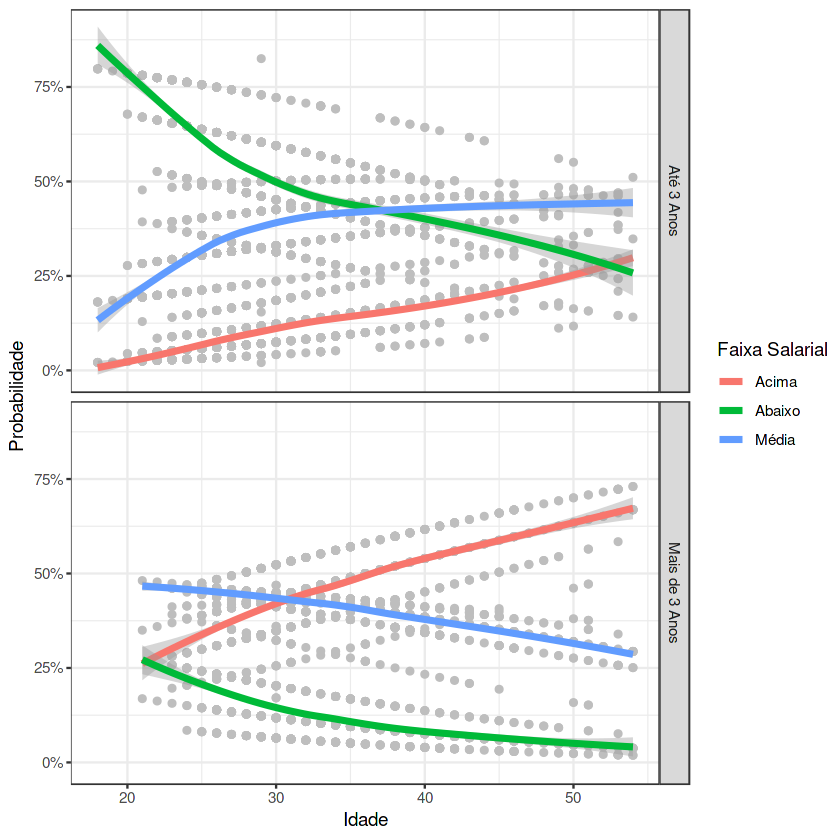

In [9]:
data_prev = cbind(newdf[ , c(3,4,5)], predict(mod, type = "probs", se = TRUE))

data_prev = reshape2::melt(data_prev,
                           id.vars = c("Idade", "Nivel de Ensino", "Xp_Area de Dados"),
                           value.name = "Probabilidade",
                           variable.name = "Faixa Salarial")
						   
ggplot(data_prev, aes(x = Idade, y = Probabilidade, color = `Faixa Salarial`)) +
  geom_point(color = "grey") +
  geom_smooth(method = "loess", size = 1.5) +
  labs(x = "Idade") +
  scale_y_continuous(labels = scales::percent_format(decimal.mark = ",")) +
  scale_x_continuous(labels = scales::number_format(decimal.mark = ",",
  accuracy = 1),
  breaks = seq(10, 60, 10)) +
  facet_grid(`Xp_Area de Dados` ~ .) +
  theme_bw() +
  guides(color = guide_legend(override.aes = list(fill = NA)))

![Gráfico 1](https://i.postimg.cc/g0nvTmC7/GR-FICO-1.png)

Nesse primeiro, observa-se a faixa salarial de acordo com a experiência anterior do profissional na área de dados, sendo o eixo Y a probabilidade e o eixo X a idade. Um ponto importante é a ausência de outliers no caso do entrevistado já ter mais de 3 anos de experiência na área de dados, isso significa que nesses casos, poucos fogem a regra. No caso de o profissional ser mais velho e ter menos de 3 anos de experiência em dados a probabilidade dele possuir um salário na Média é de quase 50%, um fato que muda no caso dele ter mais experiência, onde essa probabilidade cai consideravelmente, mas a probabilidade dele ter salários Acima sobem para quase 75%. Por outro lado, pouca experiência ou "instrução informal" - pode-se chamar assim - e pouca idade representa uma probabilidade altíssima de salário Abaixo da média.

`geom_smooth()` using formula 'y ~ x'



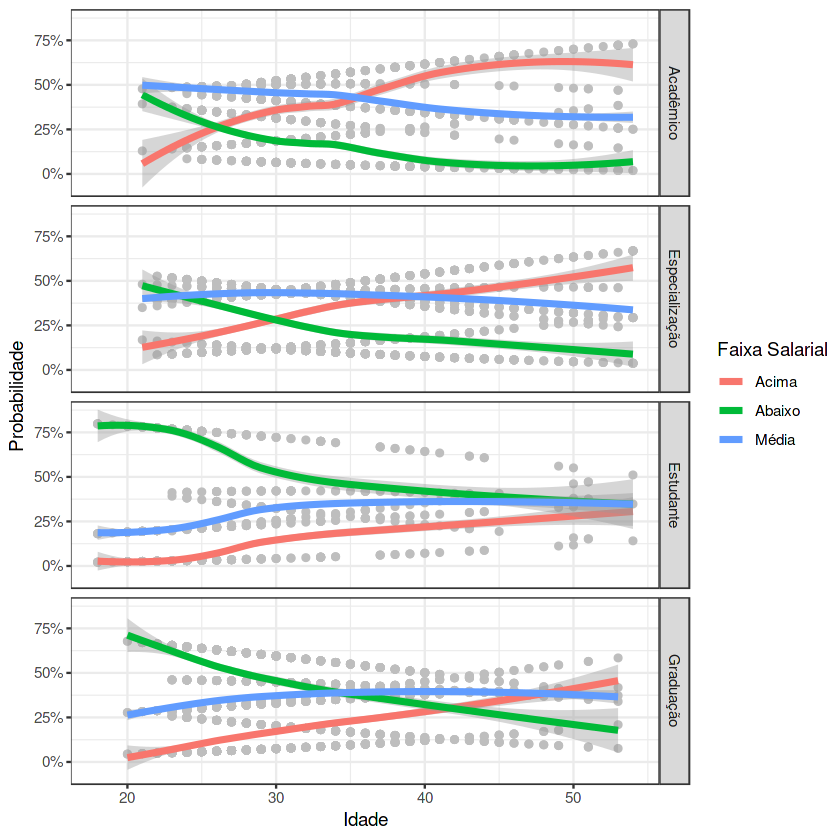

In [10]:
data_prev = data_prev%>%mutate(Ensino = format(data_prev$`Nivel de Ensino`))

data_prev$Ensino = ifelse(data_prev$`Nivel de Ensino` == "1", "Estudante", data_prev$Ensino)
data_prev$Ensino = ifelse(data_prev$`Nivel de Ensino` == "2", "Graduação", data_prev$Ensino)
data_prev$Ensino = ifelse(data_prev$`Nivel de Ensino` == "3", "Especialização", data_prev$Ensino)
data_prev$Ensino = ifelse(data_prev$`Nivel de Ensino` == "4", "Acadêmico", data_prev$Ensino)
data_prev$Ensino = as.factor(data_prev$Ensino)

data_prev = dplyr::filter(data_prev, data_prev$Ensino != 0)

ggplot(data_prev, aes(x = Idade, y = Probabilidade, color = `Faixa Salarial`)) +
  geom_point(color = "grey") +
  geom_smooth(method = "loess", size = 1.5) +
  labs(x = "Idade") +
  scale_y_continuous(labels = scales::percent_format(decimal.mark = ",")) +
  scale_x_continuous(labels = scales::number_format(decimal.mark = ",",
  accuracy = 1),
  breaks = seq(10, 60, 10)) +
  facet_grid(Ensino ~ .) +
  theme_bw() +
  guides(color = guide_legend(override.aes = list(fill = NA)))

![Gráfico 2](https://i.postimg.cc/ryQwKx0S/GR-FICO-2.png)

Já no segundo gráfico, a experiência na área de dados foi substituida pela instrução formal, aqui dividida em quatro possibilidades: Estudante, que pode
ser estudantes de graduação ou de formação não identificada; Graduação; Especialização (pós-graduação) e Acadêmico (Mestrado e Doutorado). Em todos os casos nota-se uma certa ausência de outliers e o fenômeno notado anteriormente continua, ou seja, a medida que o entrevistado for do tipo acima de 40 anos, maior a probabilidade dele receber salários na Média ou Acima da média. Da mesma forma, as chances dos menores salários ficarem com os profissionais mais novos em idade é muito maior, sendo incrivelmente maior no caso deste profissional não ter sequer uma graduação reconhecida ou identificada.

**7. Considerações Finais
**

Analisando tudo o que foi colocado acima, percebe-se que a idade é um fator importante quando o assunto é salário na área de Ciência de Dados, isso significa dizer que ele é mais importante que a instrução seja ela formal ou informal? A resposta é: depende. De fato, segundo a amostra analisada, sobretudo após a aplicação da regressão logística muntinominal, quanto mais velho, ou melhor, se tiver mais de 40 anos, maiores as chances de seu salário ser algo entre 6 mil ou mais dentro dessa área, enquanto que tendo pouco mais de 20 anos, ainda que com boa formação, essa probabilidade cai consideravelmente, ainda assim, o gráfico de correlação deixa claro também a importância da instrução.

Por fim, para os candidatos à área de Ciência de Dados, a melhor das hipóteses, caso o objetivo seja obter os melhores salários, seria algo como a junção entre idade e conhecimento.

**8. Referências**

(1) Idosos no mercado de trabalho: Entenda o cenário, vantagens e como incluí-los <https://blog.solides.com.br/idosos-no-mercado-de-trabalho/#:~:text=Em%202018%2C%20o%20%C3%ADndice%20aumentou,%2C5%25%20registrados%20em%202013>

(2) Recolocação após os 60 é tarefa difícil e individual <https://infograficos.estadao.com.br/focas/planeje-sua-vida/recolocacao-apos-os-60-e-tarefa-dificil-e-individual>

(3) Trabalhadores em cargos de liderança no mercado de trabalho formal brasileiro entre os anos
de 1995, 2005 e 2015 <https://periodicos2.uesb.br/index.php/ccsa/article/view/3238>

(4) How Relevant is the Independence of Irrelevant Alternatives? <https://statisticalhorizons.com/iia>